In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,f1_score, precision_recall_curve,average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,HalvingGridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

In [53]:
df = pd.read_csv("c:/users/asus/Desktop/Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2      0.0              1          1               1         101348.9   
1       1  83807.9              1          0               1         112542.6   
2       8 159660.8              3          1               0         113931.6   
3       1      0.0              2          0               0          93826.6   
4       2 125510.8              1          1               1          79084.1   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

## Exploratory Data Analysis and Visualization

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.shape

(10000, 14)

In [56]:
df.isnull().sum().any()

False

In [57]:
df.duplicated().sum() 

0

In [58]:
df.describe().T 

count       mean     std        min        25%        50%  \
RowNumber       10000.0     5000.5  2886.9        1.0     2500.8     5000.5   
CustomerId      10000.0 15690940.6 71936.2 15565701.0 15628528.2 15690738.0   
CreditScore     10000.0      650.5    96.7      350.0      584.0      652.0   
Age             10000.0       38.9    10.5       18.0       32.0       37.0   
Tenure          10000.0        5.0     2.9        0.0        3.0        5.0   
Balance         10000.0    76485.9 62397.4        0.0        0.0    97198.5   
NumOfProducts   10000.0        1.5     0.6        1.0        1.0        1.0   
HasCrCard       10000.0        0.7     0.5        0.0        0.0        1.0   
IsActiveMember  10000.0        0.5     0.5        0.0        0.0        1.0   
EstimatedSalary 10000.0   100090.2 57510.5       11.6    51002.1   100193.9   
Exited          10000.0        0.2     0.4        0.0        0.0        0.0   

                       75%        max  
RowNumber           7500.2    10000.0  
CustomerId      15753233.8 15815690.0  
CreditScore          718.0      850.0  
Age                   44.0       92.0  
Tenure                 7.0       10.0  
Balance           127644.2   250898.1  
NumOfProducts          2.0        4.0  
HasCrCard              1.0        1.0  
IsActiveMember         1.0        1.0  
EstimatedSalary   149388.2   199992.5  
Exited                 0.0        1.0

In [59]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

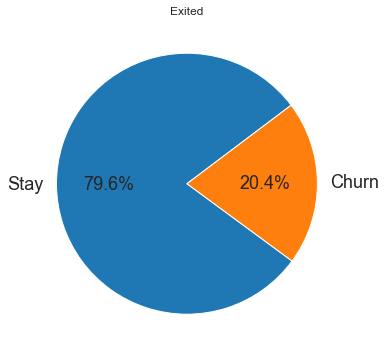

In [60]:
df.Exited.value_counts().plot.pie(autopct='%1.1f%%', 
                                  startangle=37, 
                                  fontsize=18, 
                                  labels=["Stay","Churn"], 
                                  ylabel='',
                                  title='Exited');

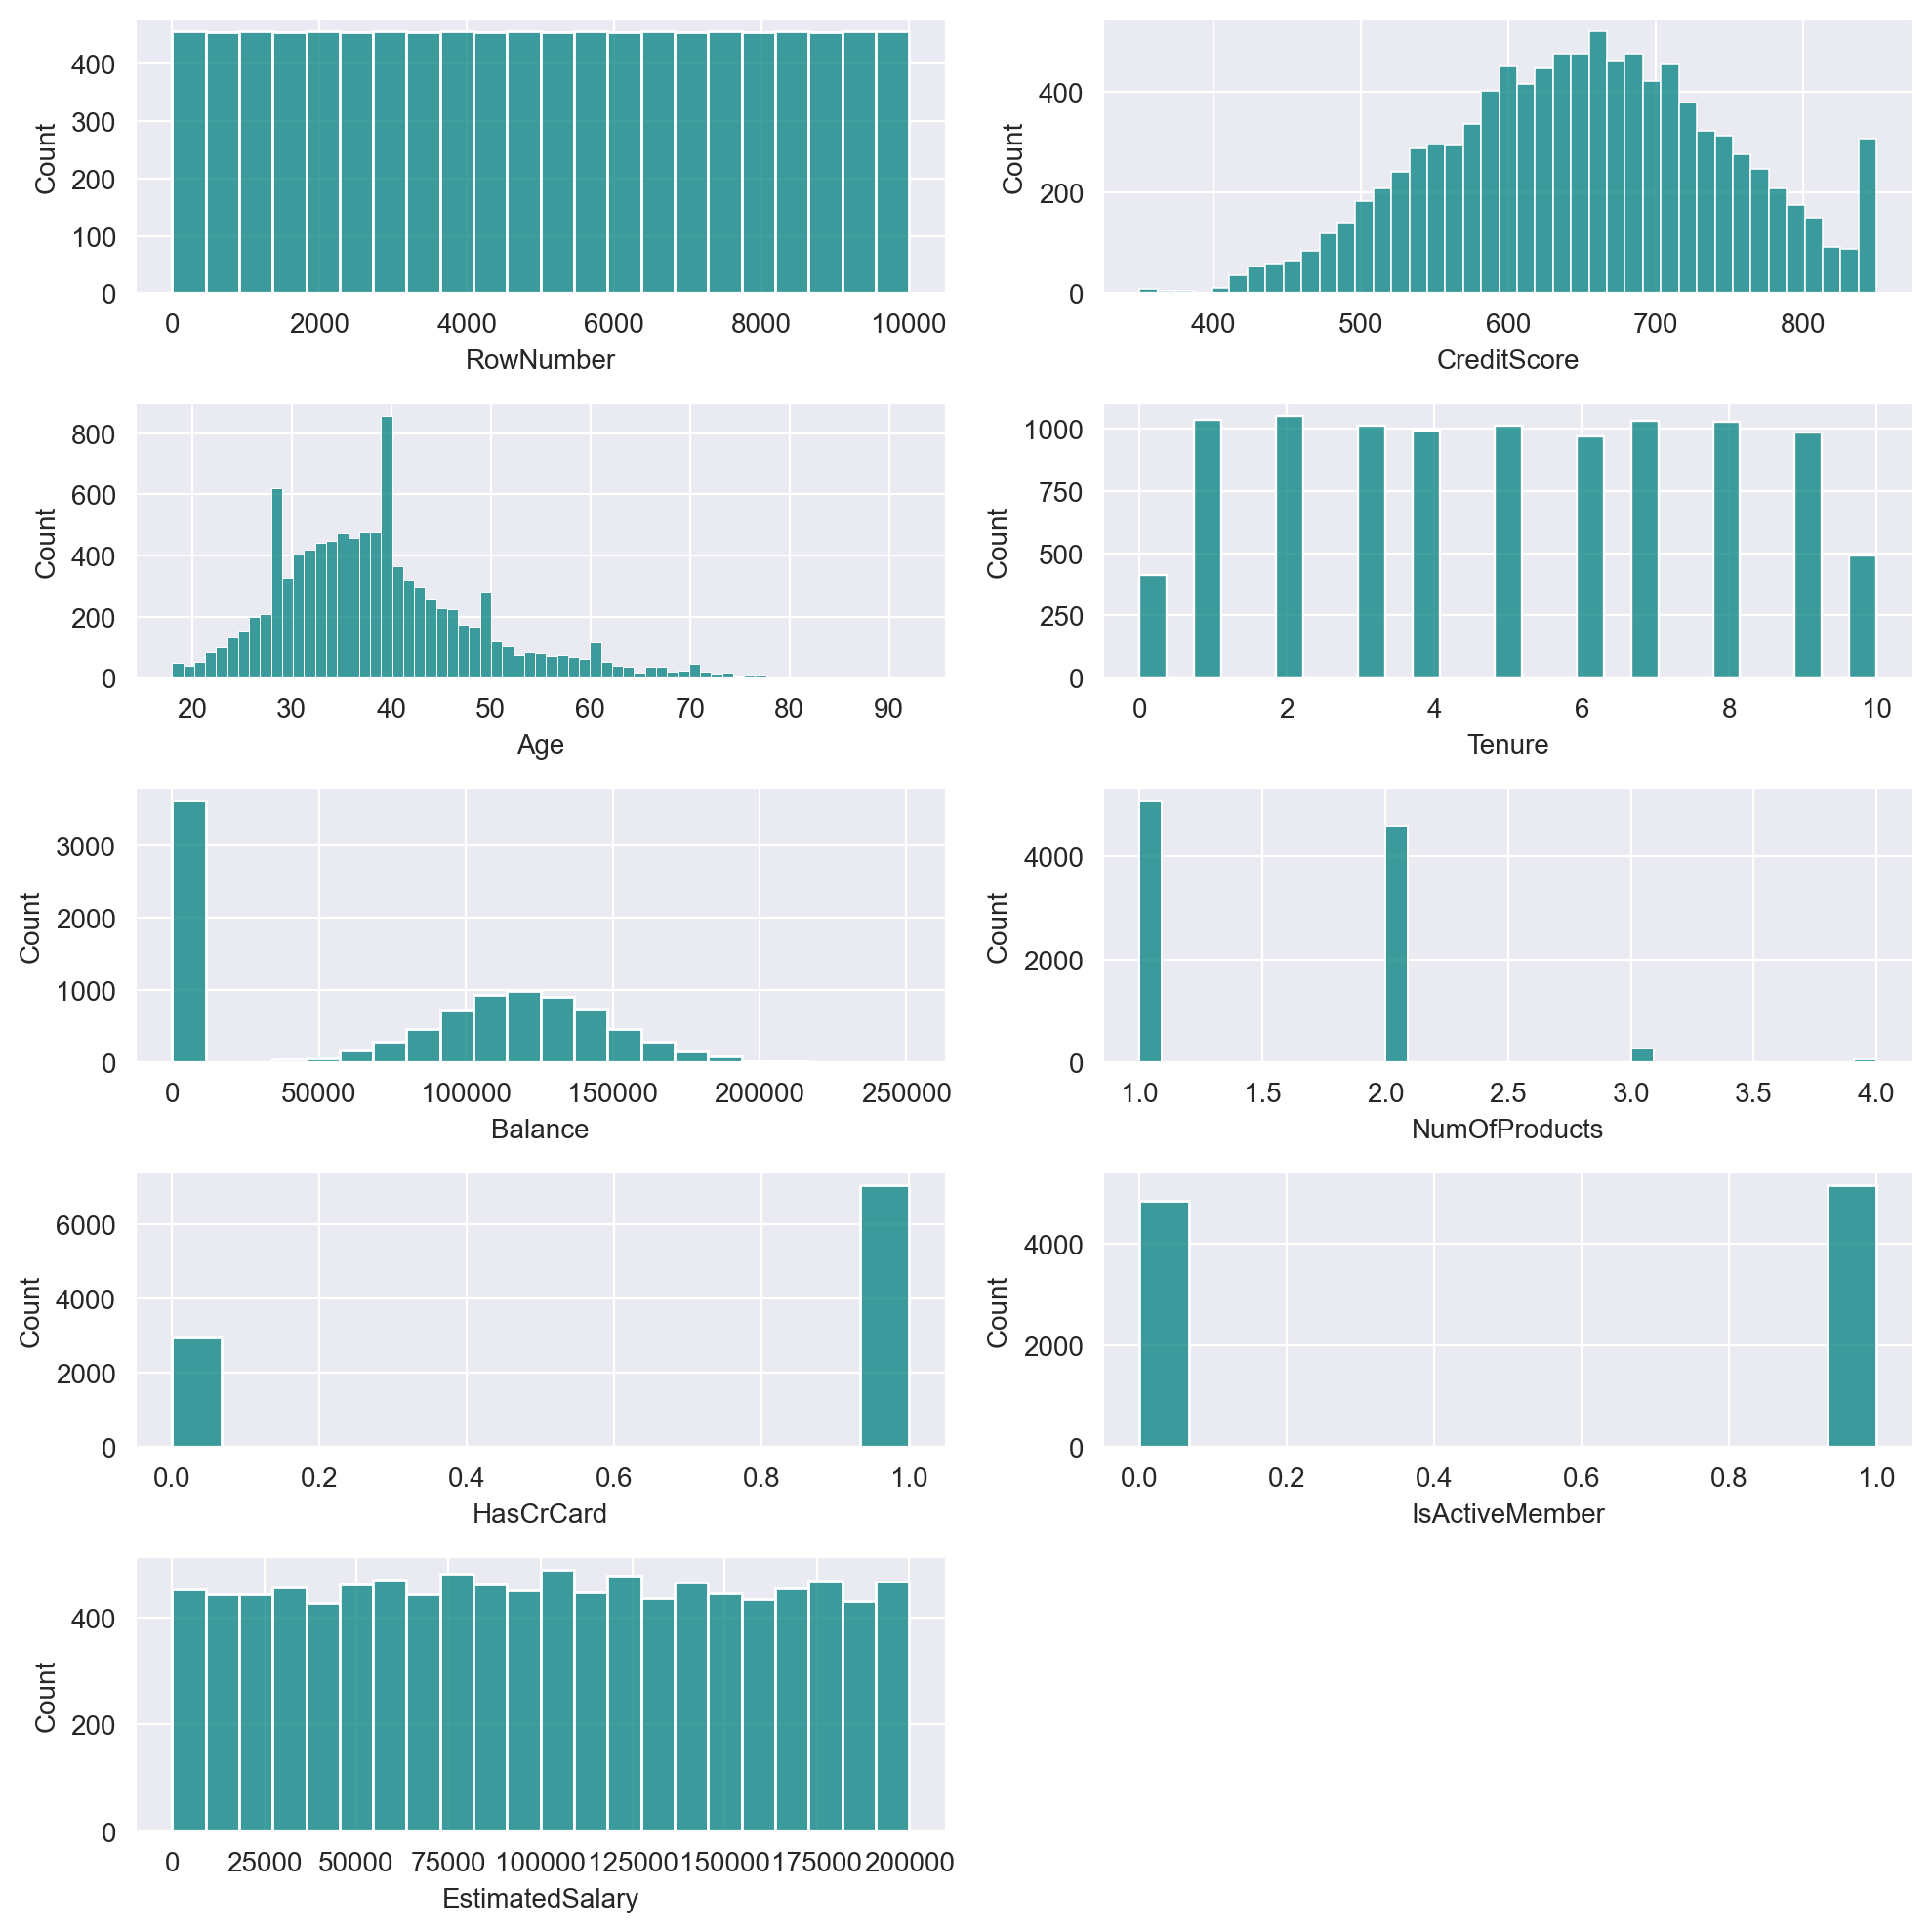

In [61]:
fig = plt.figure(figsize=(10,10), dpi=200)
for i, col in enumerate(df.select_dtypes(exclude="object").columns[:-1]):
        plt.subplot(5,2,i+1)
        sns.histplot(df[col], color="teal", )
plt.tight_layout();

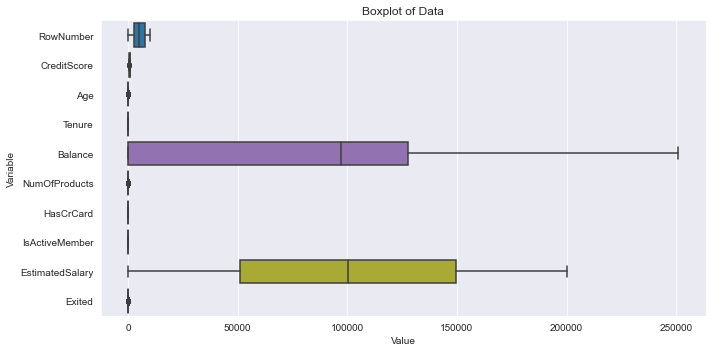

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="h", linewidth=1.5)
plt.title("Boxplot of Data")
plt.ylabel("Variable")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

In [63]:
def column_box(col):
    plt.figure(figsize=(10, 7))
    sns.boxplot(data=df,
                y=df[col],
                x=df["Exited"],
                palette='deep',
                saturation=1);


cols = df.select_dtypes(exclude="object").columns[:-1]
interact(column_box, col=cols);

interactive(children=(Dropdown(description='col', options=('RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balanâ€¦

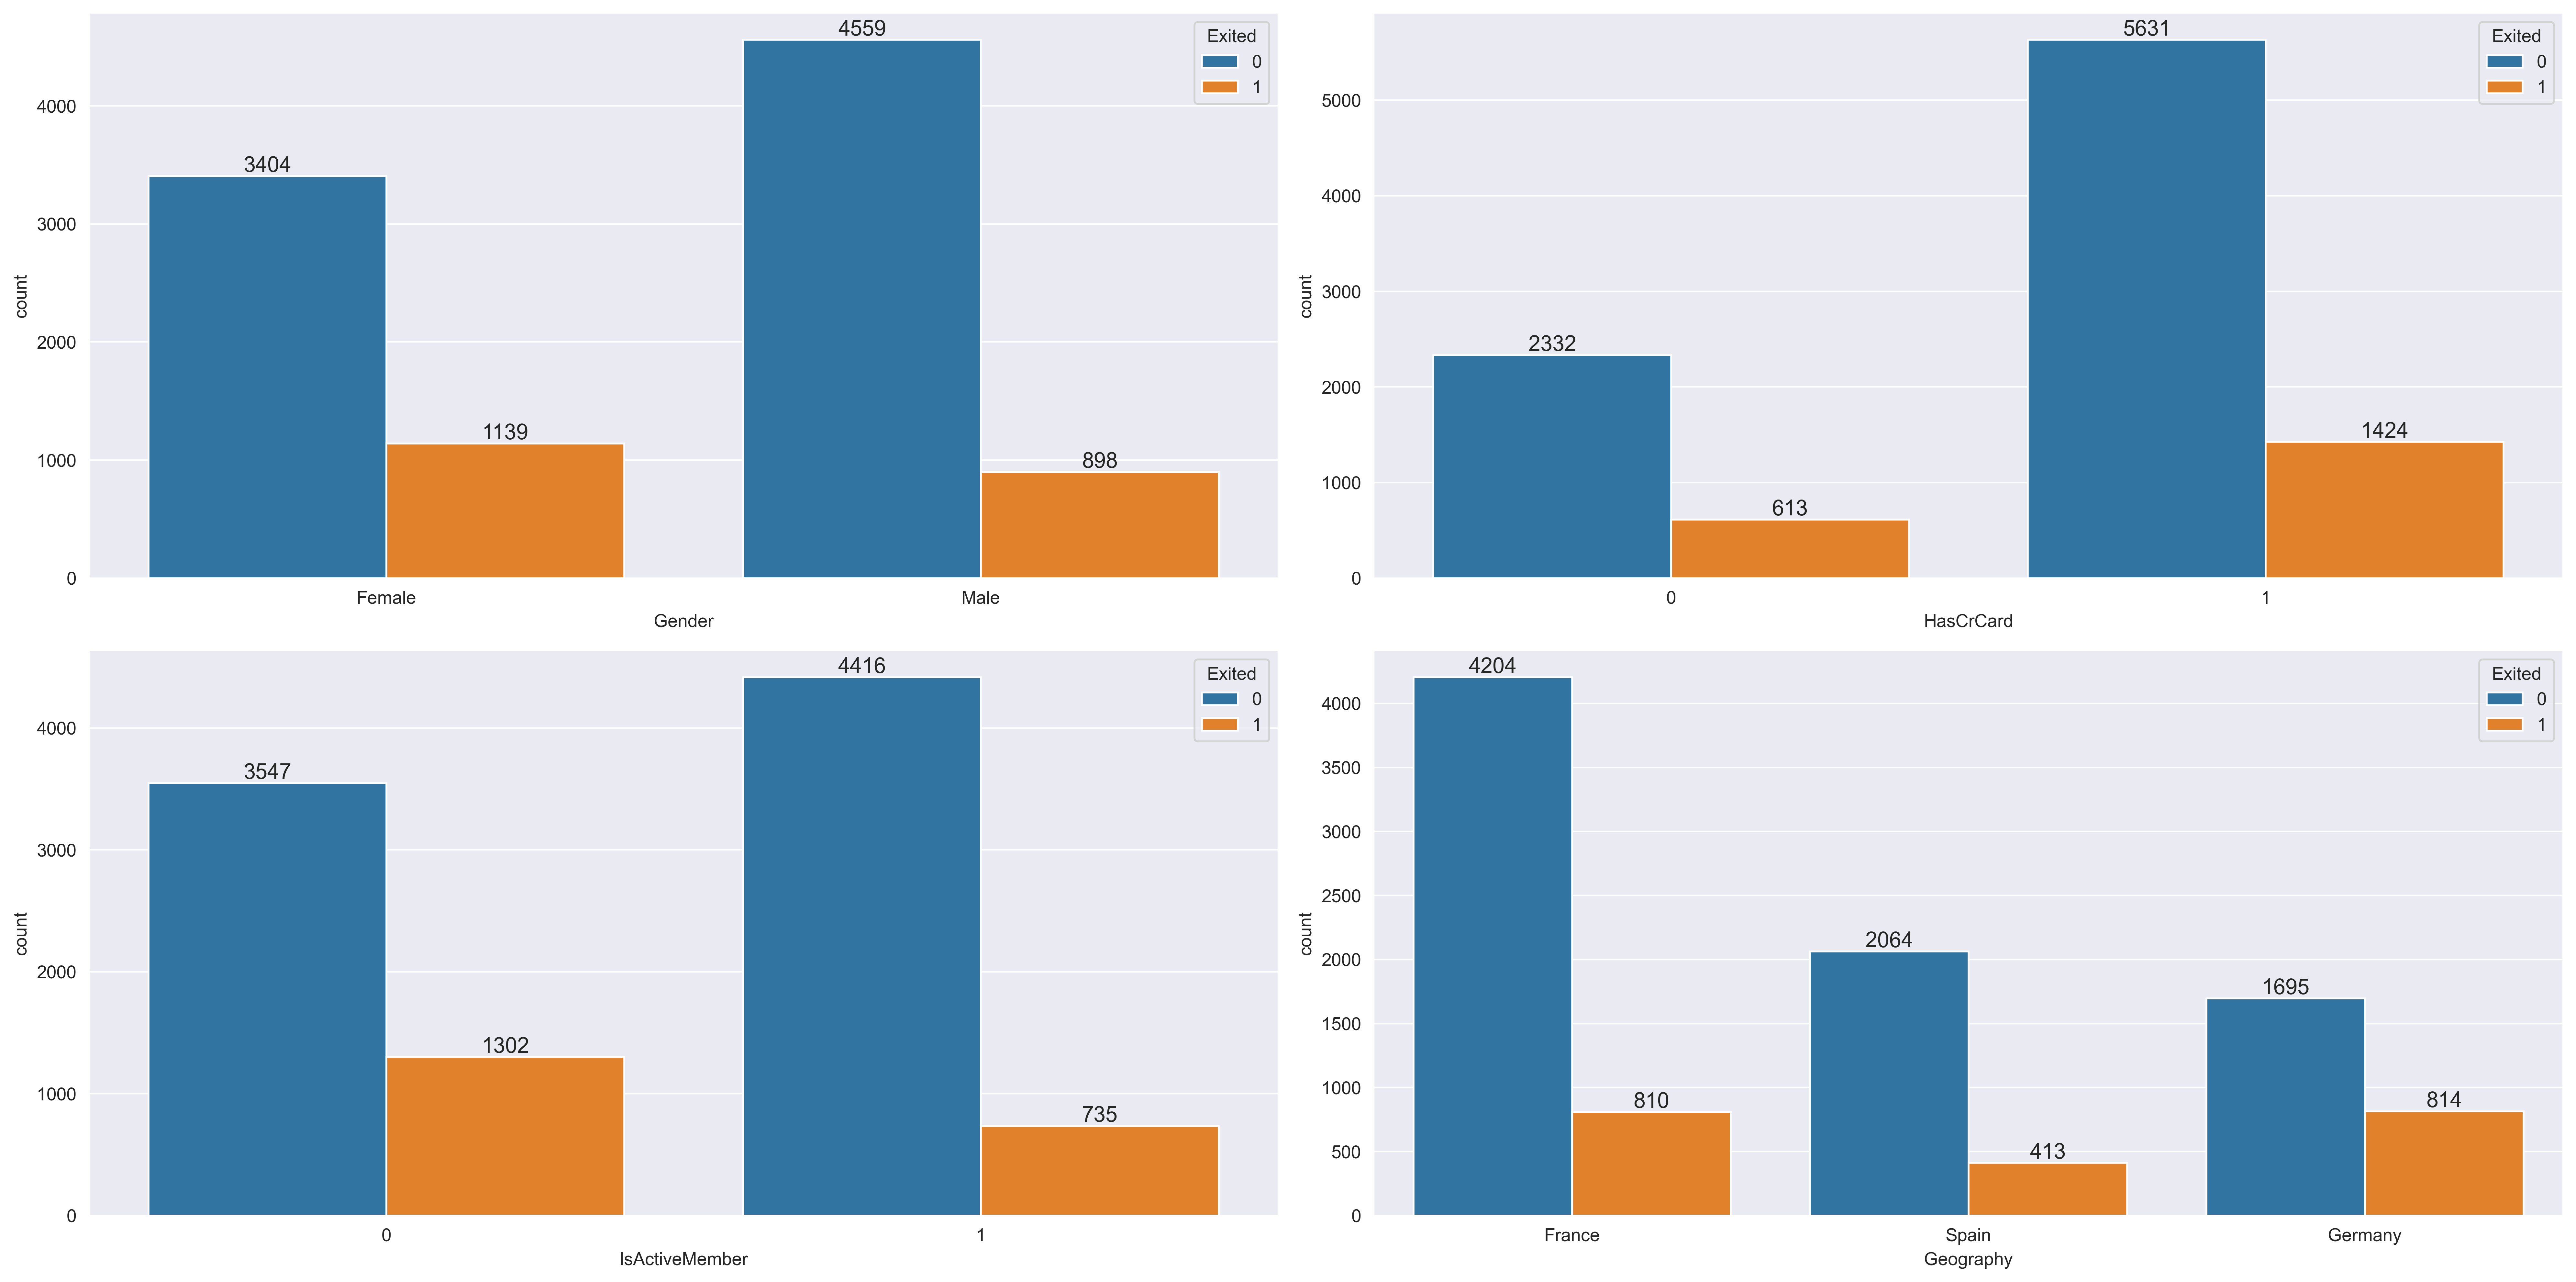

In [64]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(20, 10), dpi=400)
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data=df, x=i, hue="Exited")
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f', size=12)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

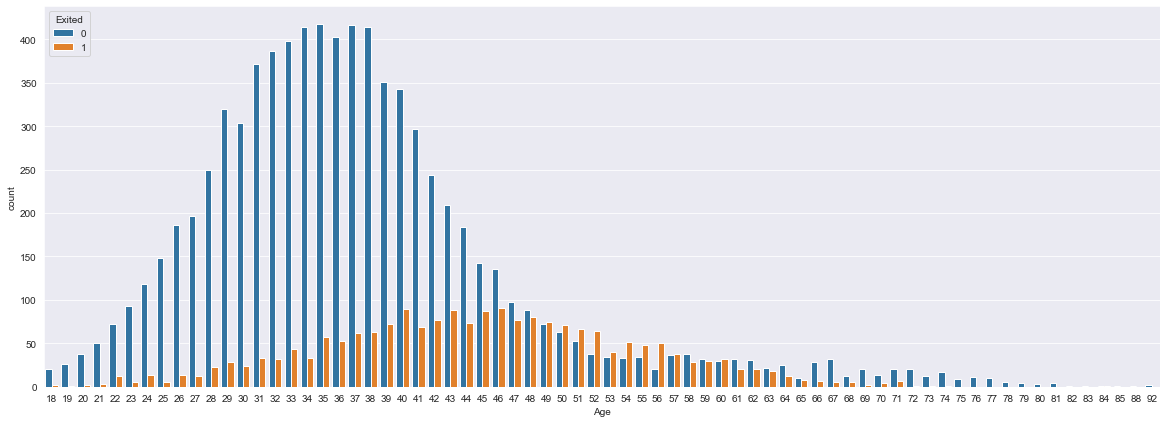

In [65]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited)

## Feature engineering

In [66]:
df.CreditScore.describe()

count   10000.0
mean      650.5
std        96.7
min       350.0
25%       584.0
50%       652.0
75%       718.0
max       850.0
Name: CreditScore, dtype: float64

In [67]:
def credit_transformer(x, y):
    """to prodduce a new value by using credit score and has credit card"""

    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [68]:
customer_value = [
    credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)
]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [69]:
df.insert(10, "customer_value", customer_value)

In [70]:
df.customer_value

0       3
1       2
2       3
3       2
4       4
       ..
9995    4
9996    3
9997    2
9998    4
9999    4
Name: customer_value, Length: 10000, dtype: int64

<AxesSubplot:>

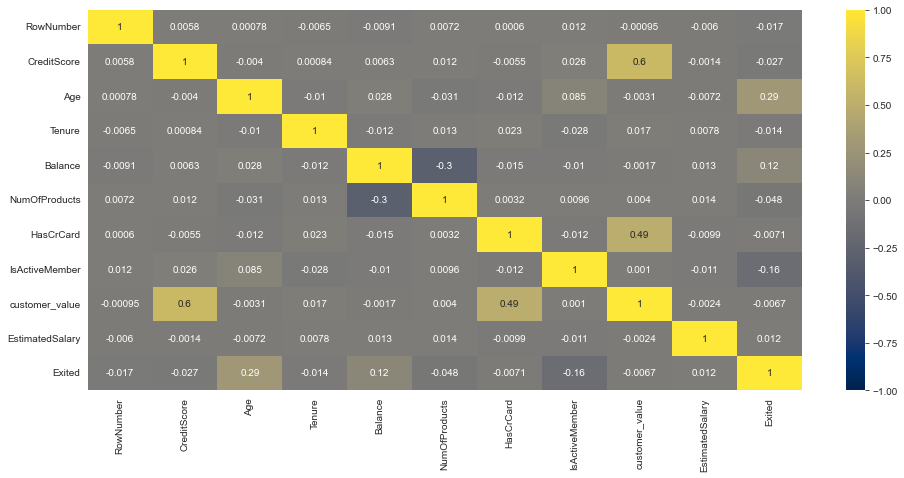

In [71]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot=True, cmap='cividis', vmin=-1, vmax=1)

## Preprocessing of Data

In [72]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [74]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        #drop="first", 
                        handle_unknown="ignore")

In [75]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [76]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### without class_weigth

In [79]:
tf.random.set_seed(42) 

model = Sequential() 

model.add(Dense(16, activation="relu")) 
model.add(Dense(8, activation="relu"))  
model.add(Dense(1, activation="sigmoid")) 

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) 

In [80]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=8,
                           restore_best_weights=True)

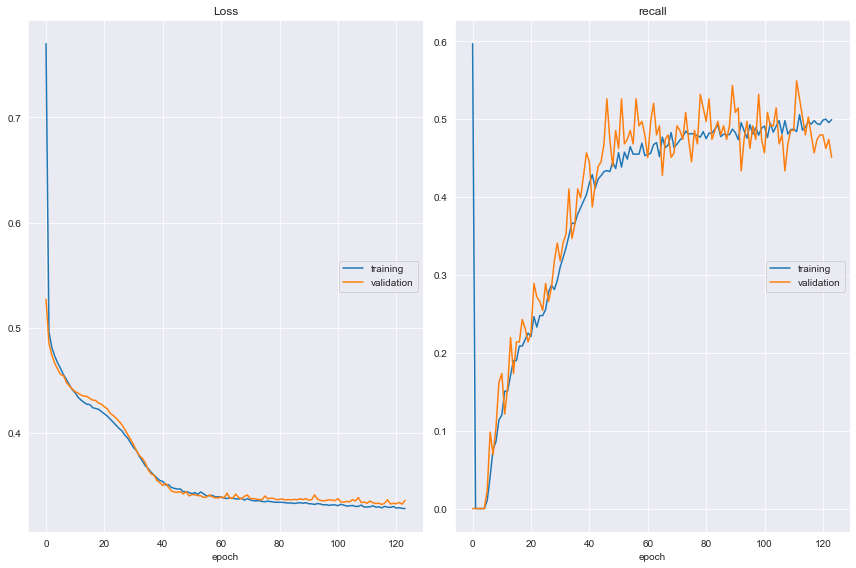

Loss
	training         	 (min:    0.328, max:    0.770, cur:    0.328)
	validation       	 (min:    0.332, max:    0.527, cur:    0.336)
recall
	training         	 (min:    0.000, max:    0.597, cur:    0.499)
	validation       	 (min:    0.000, max:    0.549, cur:    0.451)
60/60 [==============================] - 1s 14ms/step - loss: 0.3283 - recall: 0.4994 - val_loss: 0.3362 - val_recall: 0.4509
Epoch 124: early stopping


In [81]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()])

In [82]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(15, 16) dtype=float32, numpy=
 array([[ 0.2701958 ,  0.34084052, -0.18510643,  0.38216522, -0.1586262 ,
          0.23848358, -0.12760645,  0.02099434,  0.3875565 ,  0.31466976,
          0.32924992, -0.24619412, -0.14148581,  0.01553998,  0.30207774,
         -0.01502947],
        [-0.7752161 ,  0.43854624, -0.35838497, -0.11436609, -0.02982957,
         -0.22653928, -0.20167159, -0.04873615, -0.3496104 , -0.15949033,
          0.10022296,  0.14323205, -0.15431799, -0.04066093, -0.12302291,
         -0.06679983],
        [-0.17894174,  0.0133107 , -0.05448847,  0.31722927, -0.06855335,
         -0.06722631,  0.3695189 ,  0.04178512, -0.11537254,  0.05905747,
         -0.18346694,  0.00367353,  0.21675915, -0.11884327, -0.03940225,
          0.1216176 ],
        [ 0.32573947,  0.3238497 , -0.3623048 ,  0.21180876,  0.10039977,
         -0.00409013,  0.17047703,  0.20406495, -0.23009154,  0.10662352,
         -0.08369438,  0.01457092,  0.02134444,

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                256       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

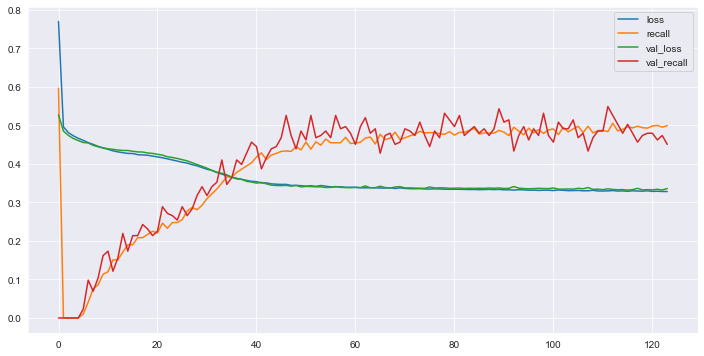

In [84]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot()

In [85]:
y_pred = (model.predict(X_test) > .5).astype(
    "int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1130   64]
 [ 155  151]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.70      0.49      0.58       306

    accuracy                           0.85      1500
   macro avg       0.79      0.72      0.75      1500
weighted avg       0.84      0.85      0.84      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

47/47 [==============================] - 0s 1ms/step


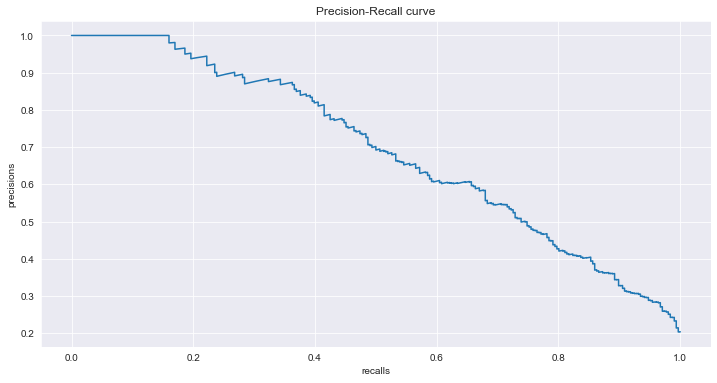

In [86]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [87]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.693132226386201

In [88]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

### with class_weigth

In [89]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [90]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [91]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

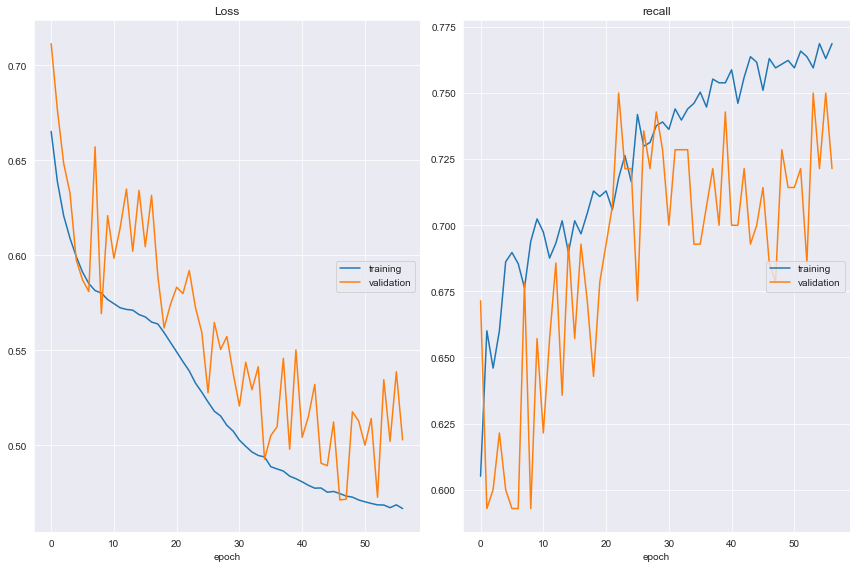

Loss
	training         	 (min:    0.467, max:    0.665, cur:    0.467)
	validation       	 (min:    0.471, max:    0.711, cur:    0.503)
recall
	training         	 (min:    0.605, max:    0.769, cur:    0.769)
	validation       	 (min:    0.593, max:    0.750, cur:    0.721)
54/54 [==============================] - 1s 11ms/step - loss: 0.4668 - recall: 0.7687 - val_loss: 0.5030 - val_recall: 0.7214
Epoch 57: early stopping


In [92]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight=class_weights)

<AxesSubplot:>

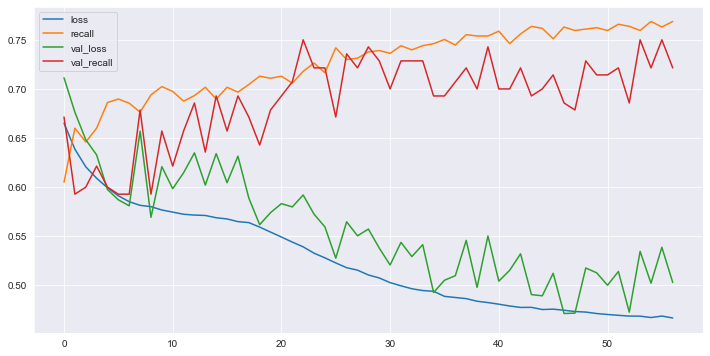

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[959 235]
 [ 93 213]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1194
           1       0.48      0.70      0.56       306

    accuracy                           0.78      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.82      0.78      0.80      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

47/47 [==============================] - 0s 1ms/step


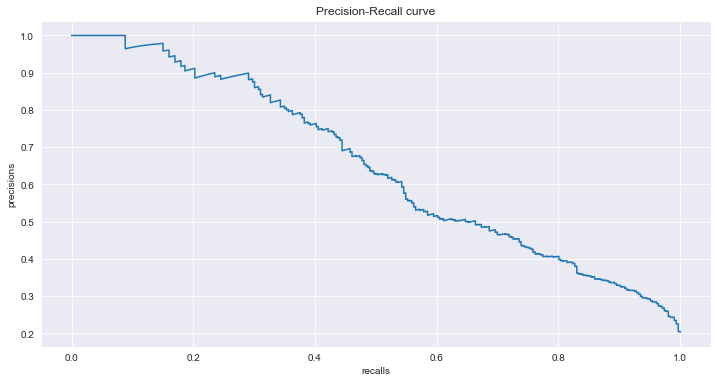

In [95]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [96]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.6502465421233095

In [97]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## Optuna (Hyperparameter optimization tool)

In [98]:
import optuna
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [99]:
class_weights

{0: 0.6278726198292843, 1: 2.4550706033376124}

In [100]:
trial_metric = "Recall"
batch_size = 512


def create_model(trial):
    
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_split=.1,
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : 
        score = score * 0
    return score

In [101]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

[I 2023-01-20 20:30:22,527] A new study created in memory with name: no-name-dd94f03f-a915-4f9e-9786-fd18c15f2974


Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping


[I 2023-01-20 20:30:26,831] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 25, 'n_units2': 48, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.03897907943230546, 'w0': 0.4761536200573475, 'w1': 0.047909448556733354}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-20 20:30:29,081] Trial 1 finished with value: 0.009803921915590763 and parameters: {'n_units1': 86, 'n_units2': 22, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 1.2526601346318727e-05, 'w0': 0.09947693100448708, 'w1': 1.9809868158016484}. Best is trial 1 with value: 0.009803921915590763.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-20 20:30:32,310] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 61, 'n_units2': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0015125863696377098, 'w0': 0.5360272941846734, 'w1': 0.06768673716403632}. Best is trial 1 with value: 0.009803921915590763.


Restoring model weights from the end of the best epoch: 18.
Epoch 28: early stopping


[I 2023-01-20 20:30:36,169] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 115, 'n_units2': 37, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.03421113683660761, 'w0': 2.2929536418202265, 'w1': 0.019818845697660303}. Best is trial 1 with value: 0.009803921915590763.


Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


[I 2023-01-20 20:30:40,605] Trial 4 finished with value: 0.5947712659835815 and parameters: {'n_units1': 78, 'n_units2': 20, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.04516403239027822, 'w0': 0.019832051560044903, 'w1': 0.061394237069026775}. Best is trial 4 with value: 0.5947712659835815.


Restoring model weights from the end of the best epoch: 26.
Epoch 36: early stopping


[I 2023-01-20 20:30:45,119] Trial 5 finished with value: 0.5032680034637451 and parameters: {'n_units1': 45, 'n_units2': 123, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.003425891596888038, 'w0': 2.1666413034923875, 'w1': 3.421301890033572}. Best is trial 4 with value: 0.5947712659835815.
[I 2023-01-20 20:30:53,787] Trial 6 finished with value: 0.6372548937797546 and parameters: {'n_units1': 13, 'n_units2': 27, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 2.5464662815736252e-05, 'w0': 1.327657241176569, 'w1': 0.015663695866702236}. Best is trial 6 with value: 0.6372548937797546.
[I 2023-01-20 20:31:02,263] Trial 7 finished with value: 0.019607843831181526 and parameters: {'n_units1': 43, 'n_units2': 57, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 2.0224680583256047e-05, 'w0': 0.14774155041760131, 'w1': 0.35295443327030146}. Best is 

Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


[I 2023-01-20 20:31:35,878] Trial 11 finished with value: 0.7026143670082092 and parameters: {'n_units1': 87, 'n_units2': 12, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.015642529875776953, 'w0': 0.01645680456633075, 'w1': 0.0733767674983318}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping


[I 2023-01-20 20:31:39,937] Trial 12 finished with value: 0.5261437892913818 and parameters: {'n_units1': 102, 'n_units2': 9, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.010606760740422744, 'w0': 0.04496161607377962, 'w1': 0.09584442157439224}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 20.
Epoch 30: early stopping


[I 2023-01-20 20:31:44,433] Trial 13 finished with value: 0.4803921580314636 and parameters: {'n_units1': 92, 'n_units2': 91, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.12063433844278068, 'w0': 0.010210744203792742, 'w1': 0.030427671192289094}. Best is trial 11 with value: 0.7026143670082092.
[I 2023-01-20 20:31:53,878] Trial 14 finished with value: 0.12418300658464432 and parameters: {'n_units1': 125, 'n_units2': 35, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 5.437012929400341e-05, 'w0': 0.06570508599960424, 'w1': 0.15067164797340094}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping


[I 2023-01-20 20:31:57,366] Trial 15 finished with value: 0.0 and parameters: {'n_units1': 72, 'n_units2': 82, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00040761855389960544, 'w0': 4.315084486661282, 'w1': 0.02648268724903309}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 53.
Epoch 63: early stopping


[I 2023-01-20 20:32:02,933] Trial 16 finished with value: 0.0 and parameters: {'n_units1': 20, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 6.578817200885094e-05, 'w0': 0.6872535082314111, 'w1': 0.034582196204244194}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 37.
Epoch 47: early stopping


[I 2023-01-20 20:32:07,176] Trial 17 finished with value: 0.4248366057872772 and parameters: {'n_units1': 27, 'n_units2': 31, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00643305716911079, 'w0': 0.2979708257704549, 'w1': 0.1409429814576619}. Best is trial 11 with value: 0.7026143670082092.
[I 2023-01-20 20:32:15,921] Trial 18 finished with value: 0.27124184370040894 and parameters: {'n_units1': 102, 'n_units2': 50, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.0006891706573522743, 'w0': 0.044410736649398326, 'w1': 0.01472708532362759}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-20 20:32:18,584] Trial 19 finished with value: 0.0 and parameters: {'n_units1': 65, 'n_units2': 77, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0011882374235163051, 'w0': 0.9702397971073445, 'w1': 0.04715143772510204}. Best is trial 11 with value: 0.7026143670082092.
[I 2023-01-20 20:32:26,643] Trial 20 finished with value: 0.1111111119389534 and parameters: {'n_units1': 35, 'n_units2': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.000181088401639406, 'w0': 0.13223245806681383, 'w1': 0.012505813227098296}. Best is trial 11 with value: 0.7026143670082092.


Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


[I 2023-01-20 20:32:31,281] Trial 21 finished with value: 0.7875816822052002 and parameters: {'n_units1': 77, 'n_units2': 17, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.007250098135330061, 'w0': 0.010168379056579791, 'w1': 0.07934873633243503}. Best is trial 21 with value: 0.7875816822052002.


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


[I 2023-01-20 20:32:34,932] Trial 22 finished with value: 0.7516340017318726 and parameters: {'n_units1': 87, 'n_units2': 9, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.009513727111149242, 'w0': 0.014421535079858905, 'w1': 0.08307563319181052}. Best is trial 21 with value: 0.7875816822052002.


Restoring model weights from the end of the best epoch: 21.
Epoch 31: early stopping


[I 2023-01-20 20:32:39,170] Trial 23 finished with value: 0.7908496856689453 and parameters: {'n_units1': 86, 'n_units2': 10, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.010646194198258456, 'w0': 0.013918648900591394, 'w1': 0.10774931519404361}. Best is trial 23 with value: 0.7908496856689453.


Restoring model weights from the end of the best epoch: 48.
Epoch 58: early stopping


[I 2023-01-20 20:32:45,990] Trial 24 finished with value: 0.8202614188194275 and parameters: {'n_units1': 98, 'n_units2': 44, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.004540132932243887, 'w0': 0.012666852827280625, 'w1': 0.21201826019923642}. Best is trial 24 with value: 0.8202614188194275.


{'n_units1': 98,
 'n_units2': 44,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.004540132932243887,
 'w0': 0.012666852827280625,
 'w1': 0.21201826019923642}

In [102]:
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=512,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 22ms/step - loss: 0.0306 - recall: 0.9880 - val_loss: 1.0634 - val_recall: 1.0000
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0261 - recall: 1.0000 - val_loss: 1.3970 - val_recall: 1.0000
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0252 - recall: 1.0000 - val_loss: 1.3731 - val_recall: 1.0000
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0246 - recall: 1.0000 - val_loss: 1.2605 - val_recall: 1.0000
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0241 - recall: 1.0000 - val_loss: 1.2675 - val_recall: 1.0000
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0238 - recall: 1.0000 - val_loss: 1.2648 - val_recall: 1.0000
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0235 - recall: 0.9993 - val_loss: 1.2503 - val_recall: 0.9929
Epoch 8/100
14/14 [=====================

In [103]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[   0 1194]
 [   0  306]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1194
           1       0.20      1.00      0.34       306

    accuracy                           0.20      1500
   macro avg       0.10      0.50      0.17      1500
weighted avg       0.04      0.20      0.07      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

47/47 [==============================] - 0s 1ms/step


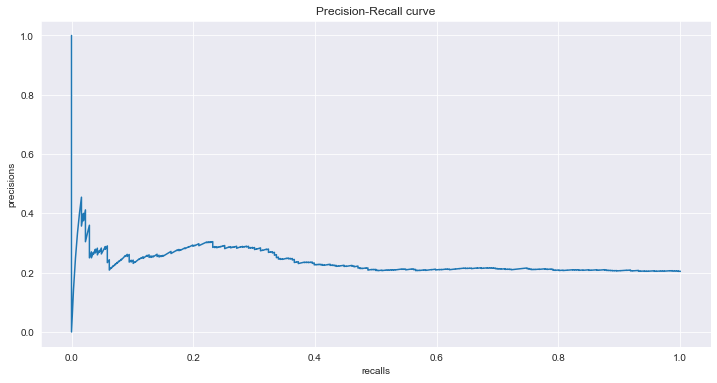

In [104]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [105]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score  

0.23654741884267955

In [106]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

## Model Comparission

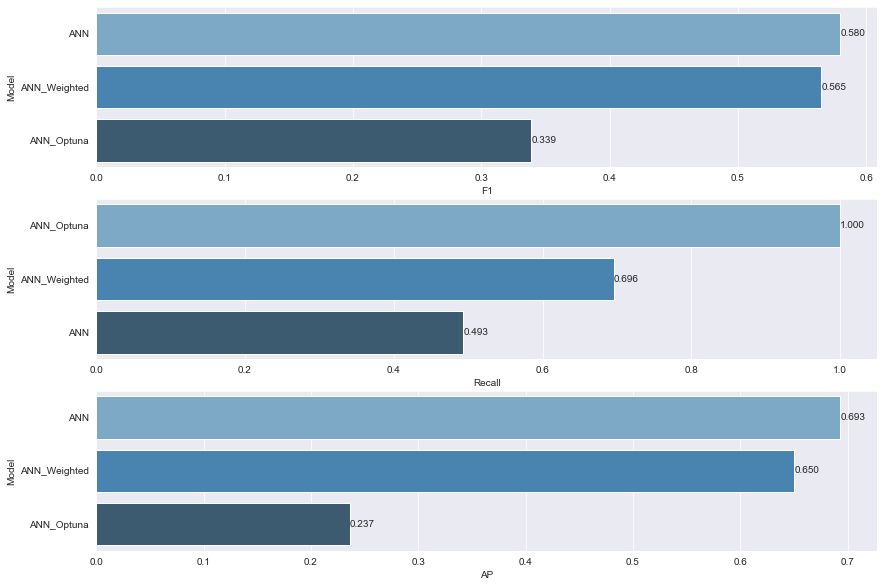

In [107]:
compare = pd.DataFrame({
    "Model": ["ANN", "ANN_Weighted", "ANN_Optuna"],
    "F1": [non_weighted_f1, weighted_f1, optuna_weighted_f1],
    "Recall": [non_weighted_recall, weighted_recall, optuna_weighted_recall],
    "AP": [non_weighted_pre_score, weighted_pre_score, optuna_pre_score]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width() 
        ax.text(
            width,  
            p.get_y() +
            p.get_height() / 2,  
            '{:1.3f}'.format(width), 
            ha='left',  
            va='center')  


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Final Model and Model Deployment

In [108]:
import pickle 

pickle.dump(col_transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", 'wb'))


In [109]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [111]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
study.best_params

{'n_units1': 98,
 'n_units2': 44,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.004540132932243887,
 'w0': 0.012666852827280625,
 'w1': 0.21201826019923642}

* balanced
- 'n_units1': 38,
- 'n_units2': 67,
- 'optimizer': keras.optimizer_v2.adam.Adam,
- 'learning_rate': 0.0021431406414847
- 'class_weight' : balanced
* best recall
- ''n_units1': 84,
- 'n_units2': 91,
- 'optimizer': keras.optimizer_v2.nadam.Nadam,
- 'learning_rate': 0.02042786100335945,
- 'w0': 0.03567341869069141,
- 'w1': 0.4176819267630142

In [114]:
tf.random.set_seed(42)
model = Sequential()

model.add(Dense(84, activation="relu"))
model.add(Dense(91, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Nadam(learning_rate=0.02042786100335945),
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=512,
          epochs=150,
          verbose=1,
          class_weight={0:0.03567341869069141, 1:0.4176819267630142})

Epoch 1/150
17/17 [==============================] - 2s 18ms/step - loss: 0.0611 - recall: 0.9601 - val_loss: 0.8021 - val_recall: 0.9183
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0556 - recall: 0.9723 - val_loss: 0.9064 - val_recall: 0.9314
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0511 - recall: 0.9341 - val_loss: 0.7074 - val_recall: 0.8725
Epoch 4/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0469 - recall: 0.9278 - val_loss: 0.6418 - val_recall: 0.8464
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0461 - recall: 0.9220 - val_loss: 0.8401 - val_recall: 0.9379
Epoch 6/150
17/17 [==============================] - 0s 6ms/step - loss: 0.0451 - recall: 0.9347 - val_loss: 0.8086 - val_recall: 0.9379
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.0448 - recall: 0.9289 - val_loss: 0.7817 - val_recall: 0.9150
Epoch 8/150
17/17 [=====================

<AxesSubplot:>

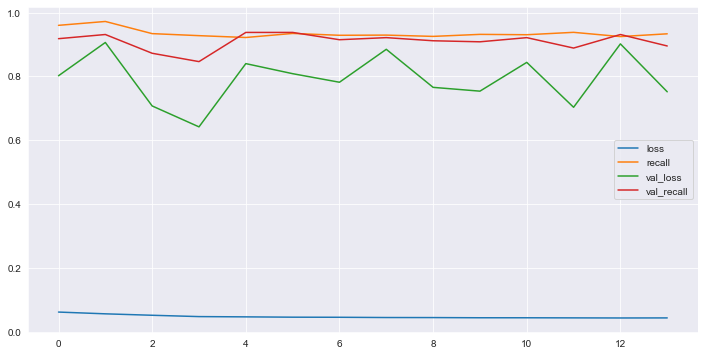

In [115]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [116]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[745 449]
 [ 47 259]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1194
           1       0.37      0.85      0.51       306

    accuracy                           0.67      1500
   macro avg       0.65      0.74      0.63      1500
weighted avg       0.82      0.67      0.70      1500



In [117]:
model.save('model_churn.h5')

### Prediction

In [118]:
single_customer = df.drop('Exited', axis=1).iloc[[0]]
single_customer

RowNumber  CreditScore Geography  Gender  Age  Tenure  Balance  \
0          1          619    France  Female   42       2      0.0   

   NumOfProducts  HasCrCard  IsActiveMember  customer_value  EstimatedSalary  
0              1          1               1               3         101348.9

In [119]:
single_customer1 = single_customer.copy()
single_customer1["Geography"] = "Spain"
single_customer1["Age"] = 35
single_customer1["Balance"] = 200000

In [120]:
single_customer1 = col_transformer.transform(single_customer1)
single_customer1

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.1900000e+02, 3.5000000e+01,
        2.0000000e+00, 2.0000000e+05, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 3.0000000e+00, 1.0134888e+05]])

In [121]:
single_customer1 = scaler.transform(single_customer1)
single_customer1

array([[0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.538     , 0.22972973, 0.2       , 0.83896995,
        0.        , 1.        , 1.        , 0.5       , 0.50673489]])

In [122]:
model.predict(single_customer1)

1/1 [==============================] - 0s 30ms/step


array([[0.4651459]], dtype=float32)

In [123]:
(model.predict(single_customer1) > 0.5).astype("int32")

1/1 [==============================] - 0s 23ms/step


array([[0]])

## Comparison with ML

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [125]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [127]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [128]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced")
clf2 = SVC(probability=True, random_state=42, class_weight="balanced")
clf3 = LogisticRegression(random_state=42, class_weight="balanced")

In [130]:

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2 + i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2 + i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [131]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3] 

In [132]:
grid_model = RandomizedSearchCV(pipeline,
                                params,
                                cv=5,
                                n_jobs=-1,
                                scoring='recall').fit(X_train, y_train)

In [133]:
grid_model.best_params_ 

{'classifier__n_estimators': 50,
 'classifier__max_depth': 5,
 'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                        random_state=42)}

In [134]:
grid_model.best_score_ 

0.7417817460978494

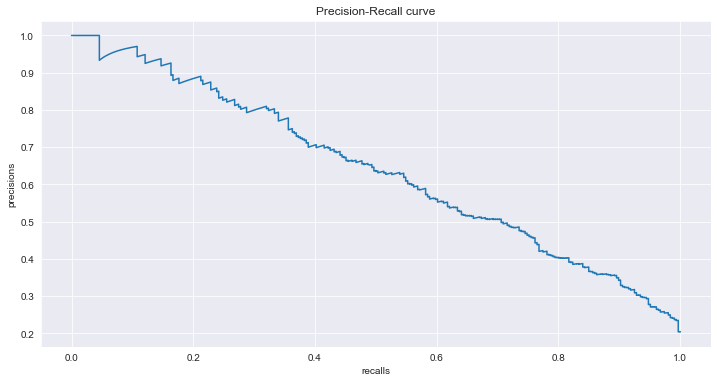

In [135]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [136]:
average_precision_score(y_test, y_pred_proba)

0.641919116902083

In [137]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[957 237]
 [ 84 222]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1194
           1       0.48      0.73      0.58       306

    accuracy                           0.79      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.83      0.79      0.80      1500

